In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.metrics as sm

In [75]:
np.set_printoptions(precision = 4, suppress = True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [77]:
df = pd.read_csv('laterality_data copy.csv')
df.head()

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,...,LI MD,LI Volume,TOI,Control,category,hand,Hand,ROI 1,ROI 2,Type
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,...,0.015758,-0.068848,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection
1,3,P1158,PING,Arc,Arc,Arc,Arc,0,M,0-12,...,NaN,0.167642,no,yes,Language,NaN,NaN,Frontal,Temporal,Association
2,3,P1158,PING,Aslant,Aslant,Aslant,Aslant,0,M,0-12,...,NaN,0.010843,yes,no,Vertical,NaN,NaN,Frontal,Frontal,Association
3,3,P1158,PING,CST,CST,CST,CST,0,M,0-12,...,0.002403,-0.012036,no,no,Motor,NaN,NaN,Medulla,Motor Cortex,Projection
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,...,-0.014053,-0.066723,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection


In [78]:
df.count()

Match Flag            44648
subjectID             44648
Data                  44648
Order_FA_child        44648
Order_volume_child    44648
Order_MD_child        44648
structureID           44648
gender                44648
gender_non            44648
Age_gr_12             44648
Age Group             44648
Age                   44648
LI FA                 41241
LI MD                 41272
LI Volume             41040
TOI                   44648
Control               44648
category              44648
hand                  43510
Hand                  43390
ROI 1                 44648
ROI 2                 44648
Type                  44648
dtype: int64

In [79]:
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20]
df = df[df.columns[cols]]

# dropping all NA's or missing data
df.dropna(how = 'any', inplace = True)
df

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,Age Group,Age,LI FA,LI MD,LI Volume,TOI,Control,category,ROI 1
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,Child,3.416667,-0.003511,0.015758,-0.068848,no,no,Cerebellar,Frontal
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,Child,3.416667,0.006478,-0.014053,-0.066723,no,no,Cerebellar,Frontal
5,3,P1158,PING,ContraMotorCerebellar,ContraMotorCerebellar,ContraMotorCerebellar,ContraMotorCerebellar,0,M,0-12,Child,3.416667,0.008928,-0.000257,-0.049949,no,no,Cerebellar,Motor
10,3,P1158,PING,MotorCerebellar,MotorCerebellar,MotorCerebellar,MotorCerebellar,0,M,0-12,Child,3.416667,0.012617,0.012994,-0.057997,no,no,Cerebellar,Motor
11,3,P1158,PING,OccipitoCerebellar,OccipitoCerebellar,OccipitoCerebellar,OccipitoCerebellar,0,M,0-12,Child,3.416667,-0.007761,0.015024,0.064990,no,no,Cerebellar,Occipital
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44640,3,CC721374,CAMCAN,VOF,VOF,VOF,VOF,0,M,80->,Senior,86.000000,-0.070059,0.028502,-0.019443,yes,no,Vertical,Occipital
44641,3,CC721374,CAMCAN,FrontoThalamic,FrontoThalamic,FrontoThalamic,FrontoThalamic,0,M,80->,Senior,86.000000,0.029330,-0.006677,0.168788,no,no,Thalamic,Frontal
44643,3,CC721374,CAMCAN,MotorThalamic,MotorThalamic,MotorThalamic,MotorThalamic,0,M,80->,Senior,86.000000,0.046822,-0.035798,0.025188,no,no,Cerebellar,Thalamic
44644,3,CC721374,CAMCAN,pArc,pArc,pArc,pArc,0,M,80->,Senior,86.000000,-0.047697,0.038274,-0.058535,yes,no,Posterior Vertical,Temporal


In [80]:
df.count()

Match Flag            35595
subjectID             35595
Data                  35595
Order_FA_child        35595
Order_volume_child    35595
Order_MD_child        35595
structureID           35595
gender                35595
gender_non            35595
Age_gr_12             35595
Age Group             35595
Age                   35595
LI FA                 35595
LI MD                 35595
LI Volume             35595
TOI                   35595
Control               35595
category              35595
ROI 1                 35595
dtype: int64

In [81]:
# find all the columns for the features that we desire adn create a new dataframe
cols = [12] #columns 12 = 'LI FA'
the_ml_data_old = df[df.columns[cols]]
the_ml_data_old

,LI FA
0,-0.003511
4,0.006478
5,0.008928
10,0.012617
11,-0.007761
...,...
44640,-0.070059
44641,0.029330
44643,0.046822
44644,-0.047697


In [82]:
# Check in on data 
the_ml_data_old.head()
the_ml_data_old.count()

LI FA    35595
dtype: int64

In [83]:
the_ml_data_old.index

Int64Index([    0,     4,     5,    10,    11,    12,    16,    17,    22,
               26,
            ...
            44635, 44636, 44637, 44638, 44639, 44640, 44641, 44643, 44644,
            44646],
           dtype='int64', length=35595)

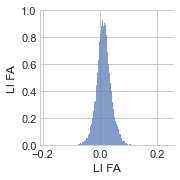

In [84]:
# create a pairplot to visually see correlations between data
sns.pairplot(the_ml_data_old, palette = 'magma')

In [85]:
# Normalize the data
# use min-max scaling to normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
the_ml_data_transformed = min_max_scaler.fit_transform(the_ml_data_old)
the_ml_data = pd.DataFrame(the_ml_data_transformed)
the_ml_data = the_ml_data.set_index(the_ml_data_old.index)

the_ml_data

,0
0,0.433071
4,0.456584
5,0.462352
10,0.471037
11,0.423066
...,...
44640,0.276417
44641,0.510379
44643,0.551555
44644,0.329056


## Data with Cluster Groups

In [86]:
# other part
km = KMeans(n_clusters=6).fit(the_ml_data)
# create another dataframe
cluster_map = pd.DataFrame()

cluster_map['ID'] = df['subjectID']
cluster_map = cluster_map.set_index(the_ml_data_old.index)

cluster_map['cluster'] = km.labels_ ########## This is where we put in the clusters that were found
cluster_map['Gender'] = pd.Series(df['gender'])
cluster_map['Age'] = pd.Series(df['Age'])
cluster_map['FA'] = the_ml_data ## has FA values stored inide of it
cluster_map['Area'] = df['Order_FA_child']
cluster_map['AgeGroup'] = df['Age Group']
cluster_map['Category'] = df['category']
cluster_map = cluster_map.set_index(the_ml_data_old.index)
cluster_map['FA'] = the_ml_data ## has FA values stored inide of it

cluster_map

,ID,cluster,Gender,Age,FA,Area,AgeGroup,Category
0,P1158,2,0,3.416667,0.433071,AnterioFrontoCerebellar,Child,Cerebellar
4,P1158,1,0,3.416667,0.456584,ContraAnterioFrontoCerebellar,Child,Cerebellar
5,P1158,1,0,3.416667,0.462352,ContraMotorCerebellar,Child,Cerebellar
10,P1158,1,0,3.416667,0.471037,MotorCerebellar,Child,Cerebellar
11,P1158,2,0,3.416667,0.423066,OccipitoCerebellar,Child,Cerebellar
...,...,...,...,...,...,...,...,...
44640,CC721374,5,0,86.000000,0.276417,VOF,Senior,Vertical
44641,CC721374,4,0,86.000000,0.510379,FrontoThalamic,Senior,Thalamic
44643,CC721374,3,0,86.000000,0.551555,MotorThalamic,Senior,Cerebellar
44644,CC721374,5,0,86.000000,0.329056,pArc,Senior,Posterior Vertical


In [87]:
# Creating Data for Cluster Data

C1 = cluster_map[cluster_map.cluster == 1]
C2 = cluster_map[cluster_map.cluster == 2]
C3 = cluster_map[cluster_map.cluster == 3]
C4 = cluster_map[cluster_map.cluster == 4]
C5 = cluster_map[cluster_map.cluster == 5]
C0 = cluster_map[cluster_map.cluster == 0]

In [88]:
# Checking the numbers/amount of each clusters.

cluster_map['cluster'].value_counts()

1    10842
4     9891
2     6629
3     5131
5     1801
0     1301
Name: cluster, dtype: int64

# Scatterplot for All Data

[Text(0.5, 1.0, 'FA vs. Category')]

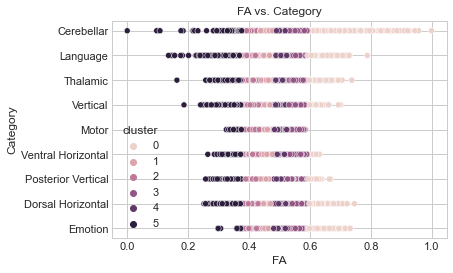

In [89]:
# Plot Cluster on Chart

sns.scatterplot(x = 'FA', y = 'Category', hue = 'cluster', data = cluster_map).set(title='FA vs. Category')

[Text(0.5, 1.0, 'FA vs. Area')]

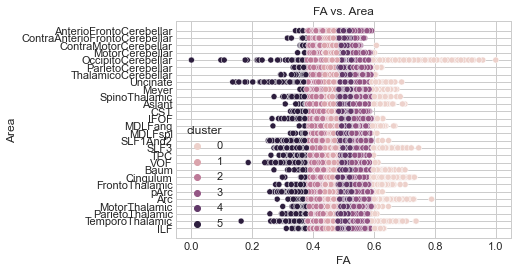

In [90]:
# Plot Cluster on Chart

sns.scatterplot(x = 'FA', y = 'Area', hue = 'cluster', data = cluster_map).set(title='FA vs. Area')

# Heat and Cluster Maps (All Data)

Text(0.5, 0.98, 'Category vs Age Group (All Data)')

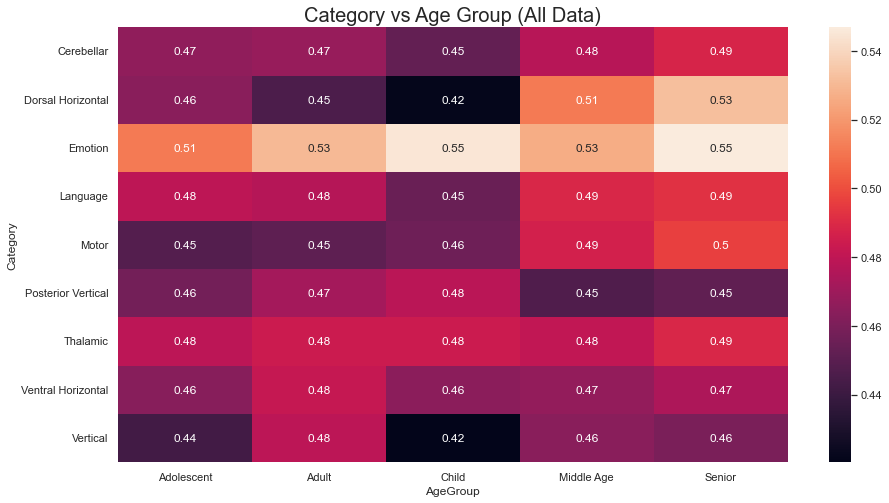

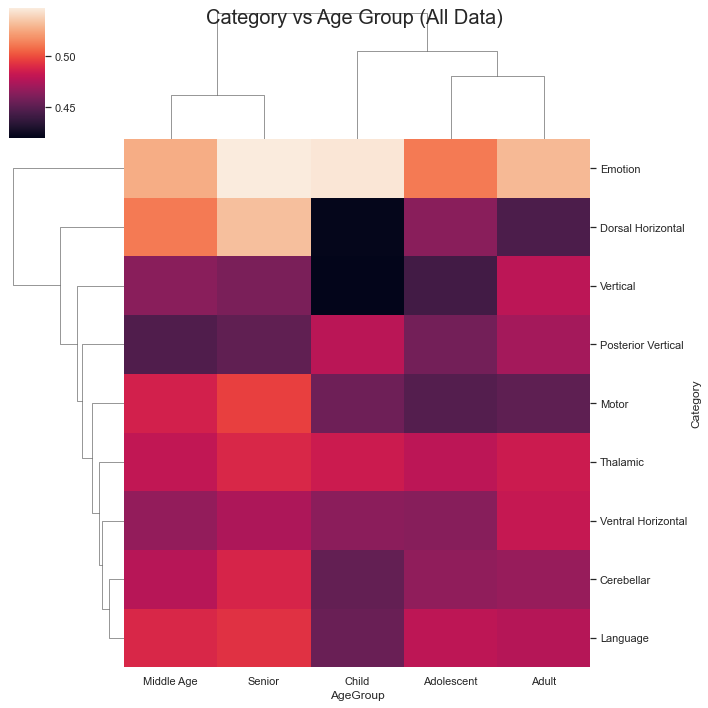

In [91]:
heatmap_data = pd.pivot_table(cluster_map, values='FA',
                             index=['Category'],
                             columns='AgeGroup')

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(heatmap_data, annot=True)
plt.title("Category vs Age Group (All Data)", fontsize =20)

sns.clustermap(heatmap_data).fig.suptitle('Category vs Age Group (All Data)', fontsize =20) 
#.set_title("Cagetory vs Age Group")

Text(0.5, 0.98, 'Cagetory vs Age Group (All Data)')

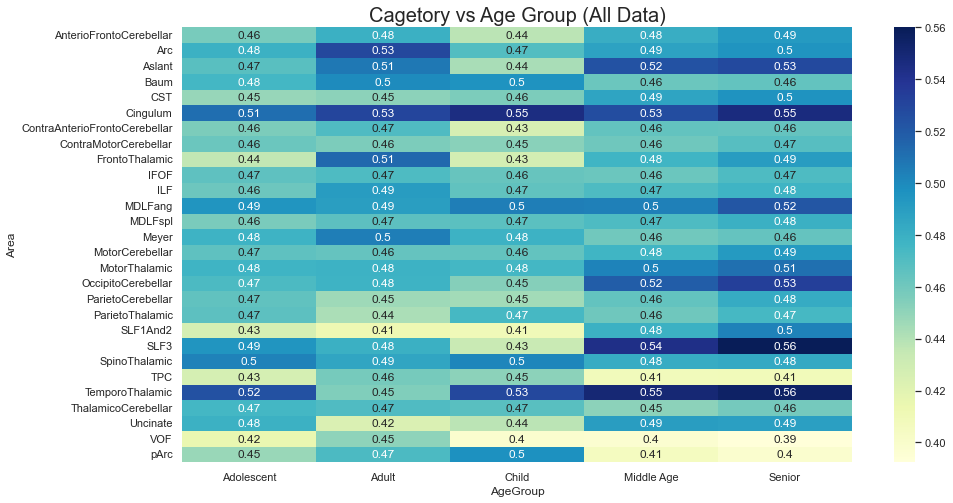

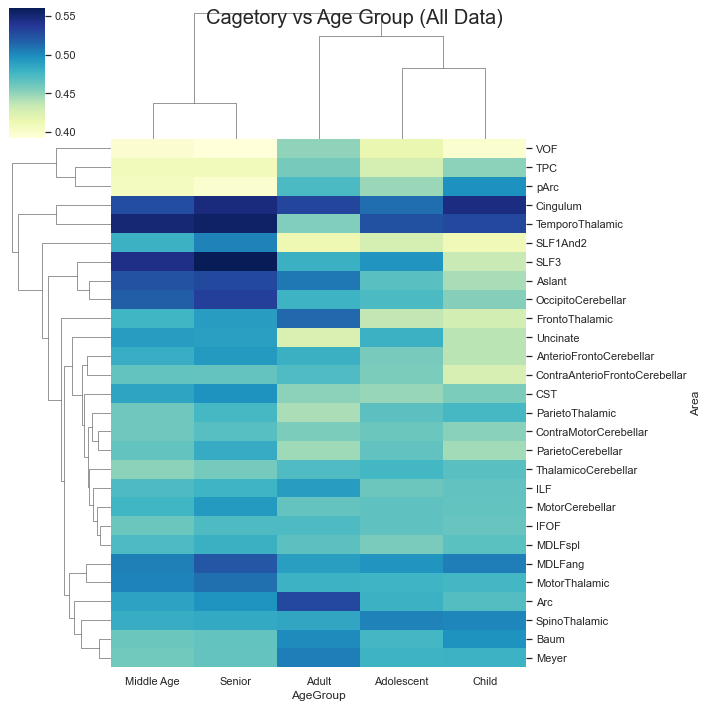

In [92]:
heatmap_data2 = pd.pivot_table(cluster_map, values='FA',
                             index=['Area'],
                             columns='AgeGroup')

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(heatmap_data2, annot=True, cmap = 'YlGnBu')
plt.title("Cagetory vs Age Group (All Data)", fontsize =20)

sns.clustermap(heatmap_data2, cmap = 'YlGnBu').fig.suptitle('Cagetory vs Age Group (All Data)', fontsize =20) 

In [93]:
heatmap_data3 = pd.pivot_table(cluster_map, values='FA',
                             index=['Area'],
                             columns='Category')
heatmap_data3.corr()

Category,Cerebellar,Dorsal Horizontal,Emotion,Language,Motor,Posterior Vertical,Thalamic,Ventral Horizontal,Vertical
Category,,,,,,,,,
Cerebellar,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dorsal Horizontal,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emotion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Language,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Motor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Posterior Vertical,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Thalamic,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Ventral Horizontal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Vertical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


^ _Area vs Category does not work because there were too many 0 correlation_

# Heat and Cluster Maps (Regarding Cluster)

## Cluster 0

### Category vs Age Group

Text(0.5, 1.0, 'Category vs Age Group (Cluster 0)')

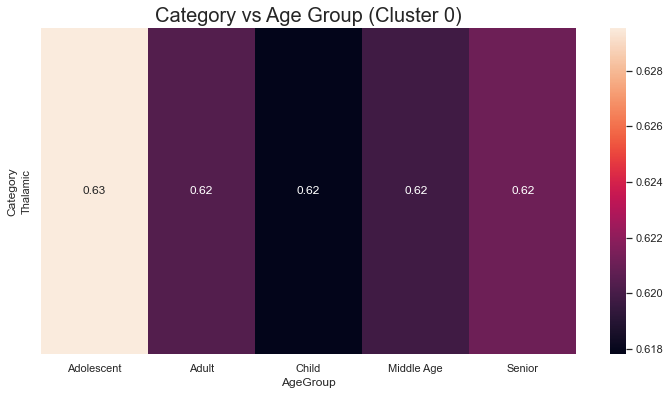

In [125]:
heatmap_data_0 = pd.pivot_table(C0, values='FA',
                             index=['Category'],
                             columns='AgeGroup')

#Drop 'NaN' for clustermap
heatmap_data_0_1 = heatmap_data_0[heatmap_data_0['Adolescent'].notna()]
heatmap_data_0_1_1 = heatmap_data_0_1[heatmap_data_0_1['Child'].notna()]

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_0_1_1, annot=True)
plt.title("Category vs Age Group (Cluster 0)", fontsize =20)

# Cluster Map
# sns.clustermap(heatmap_data_0_1_1).fig.suptitle('Category vs Age Group (Cluster 0)', fontsize =20) 
# Doesn't really work because there is only 1 Category (need at least 2)

### Area vs Age Group

Text(0.5, 0.98, 'Are vs Age Group (Cluster 0)')

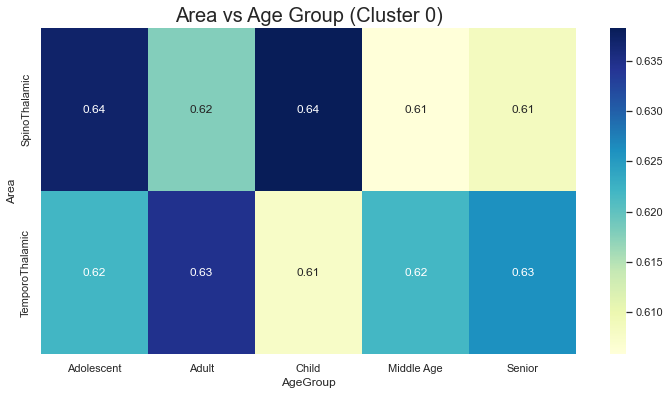

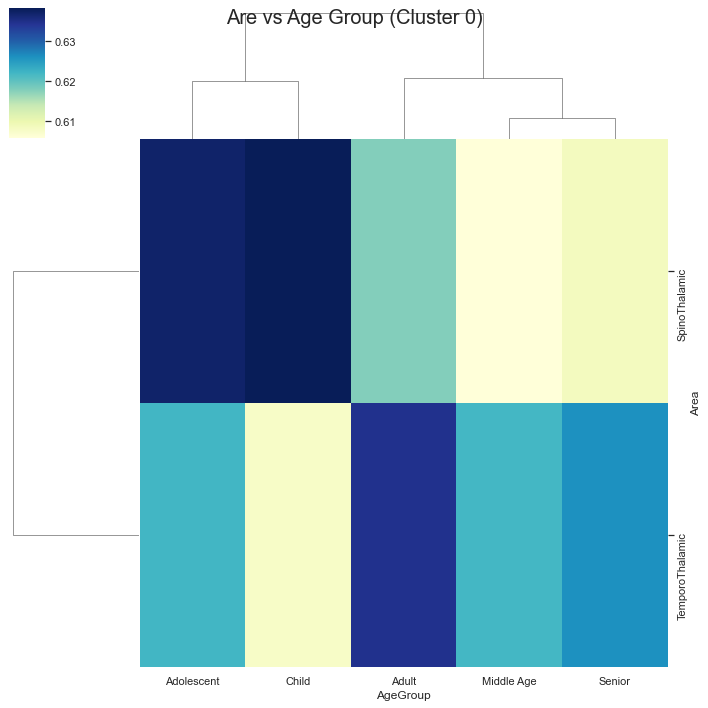

In [123]:
heatmap_data_0_2 = pd.pivot_table(C0, values='FA',
                             index=['Area'],
                             columns='AgeGroup')

#Drop 'NaN' for clustermap
heatmap_data_0_2_1 = heatmap_data_0_2[heatmap_data_0_2['Child'].notna()]
heatmap_data_0_2_2 = heatmap_data_0_2_1[heatmap_data_0_2_1['Adolescent'].notna()]
heatmap_data_0_2_2

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_0_2_2, annot=True, cmap = 'YlGnBu')
plt.title("Area vs Age Group (Cluster 0)", fontsize =20)

sns.clustermap(heatmap_data_0_2_2, cmap = 'YlGnBu').fig.suptitle('Are vs Age Group (Cluster 0)', fontsize =20) 

## Cluster 1

### Category vs Age Group

Text(0.5, 0.98, 'Category vs Age Group (Cluster 1)')

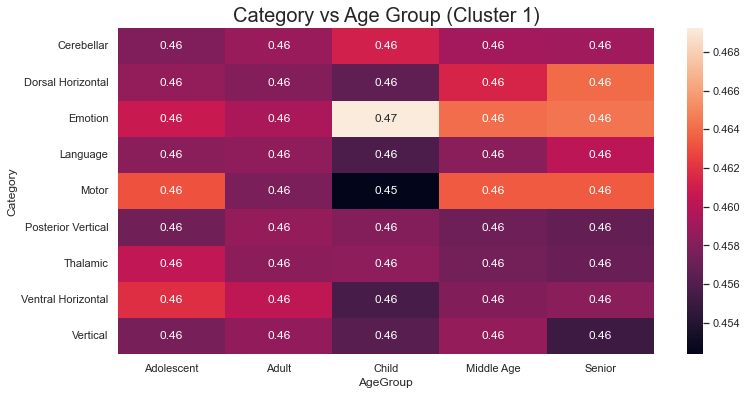

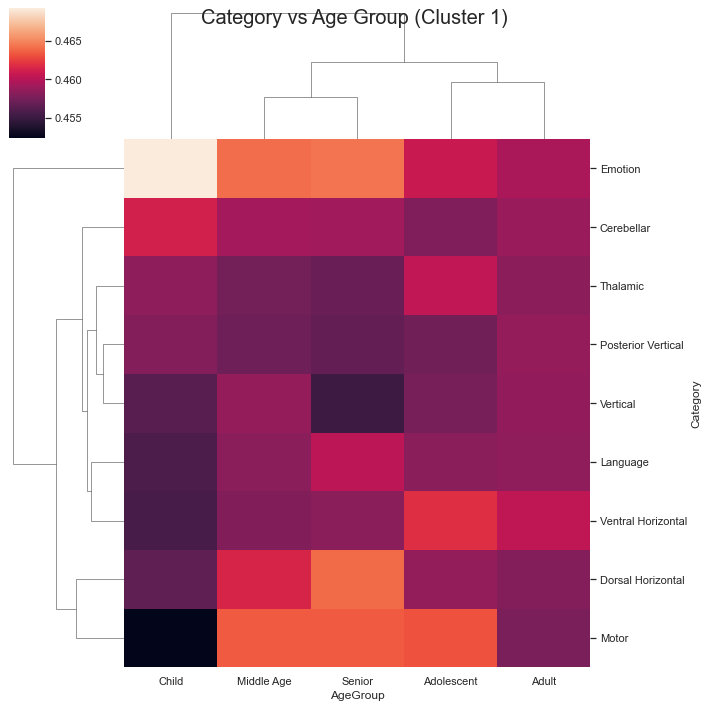

In [128]:
heatmap_data_1_1 = pd.pivot_table(C1, values='FA',
                             index=['Category'],
                             columns='AgeGroup')

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_1_1, annot=True)
plt.title("Category vs Age Group (Cluster 1)", fontsize =20)

# Cluster Map
sns.clustermap(heatmap_data_1_1).fig.suptitle('Category vs Age Group (Cluster 1)', fontsize =20) 

### Area vs Age Group

Text(0.5, 0.98, 'Are vs Age Group (Cluster 0)')

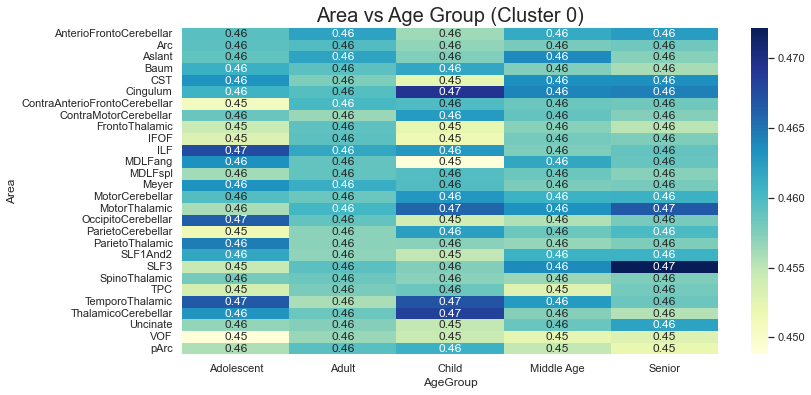

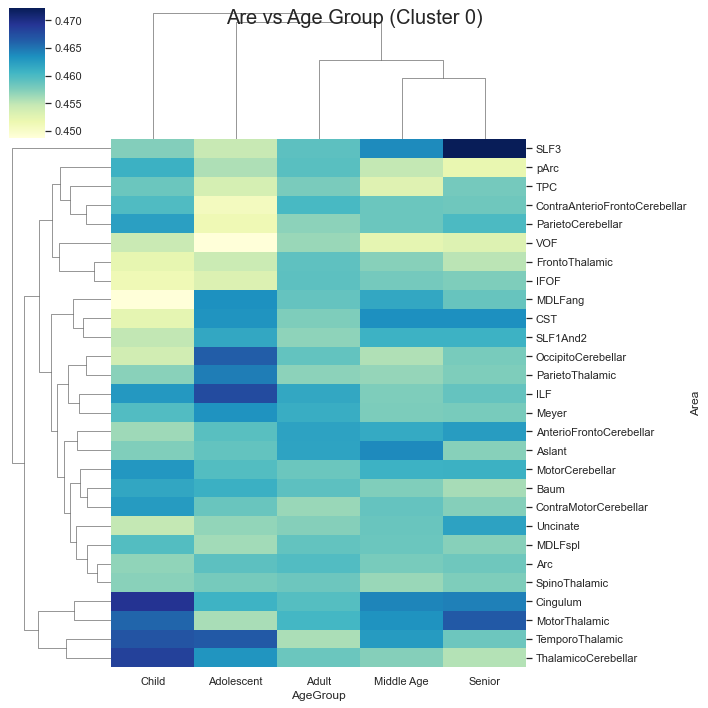

In [131]:
heatmap_data_1_2 = pd.pivot_table(C1, values='FA',
                             index=['Area'],
                             columns='AgeGroup')

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_1_2, annot=True, cmap = 'YlGnBu')
plt.title("Area vs Age Group (Cluster 0)", fontsize =20)

sns.clustermap(heatmap_data_1_2, cmap = 'YlGnBu').fig.suptitle('Are vs Age Group (Cluster 0)', fontsize =20) 

## Cluster 2

### Category vs Age Group

Text(0.5, 0.98, 'Category vs Age Group (Cluster 2)')

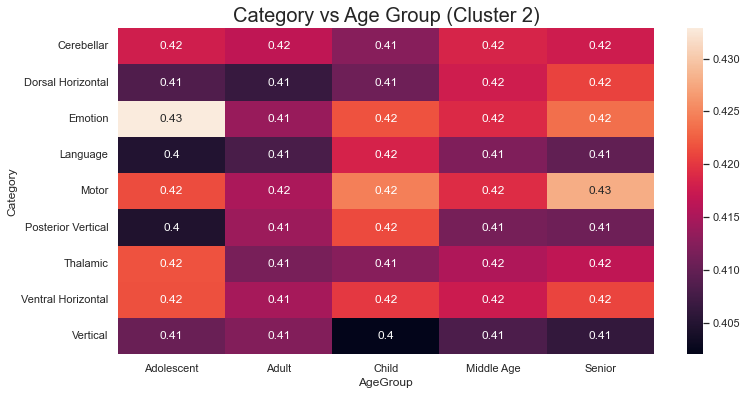

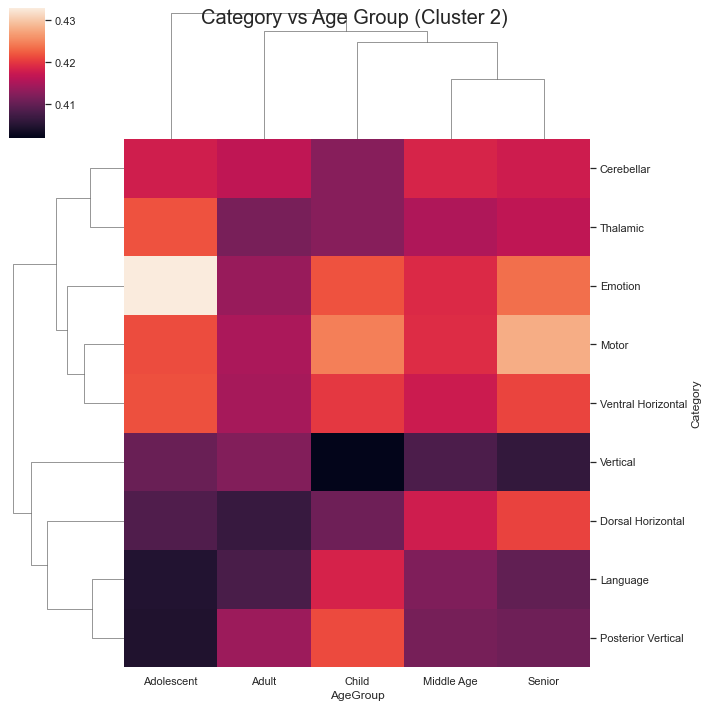

In [136]:
heatmap_data_2_1 = pd.pivot_table(C2, values='FA',
                             index=['Category'],
                             columns='AgeGroup')

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_2_1, annot=True)
plt.title("Category vs Age Group (Cluster 2)", fontsize =20)

# Cluster Map
sns.clustermap(heatmap_data_2_1).fig.suptitle('Category vs Age Group (Cluster 2)', fontsize =20) 

### Area vs Age Group

Text(0.5, 0.98, 'Are vs Age Group (Cluster 2)')

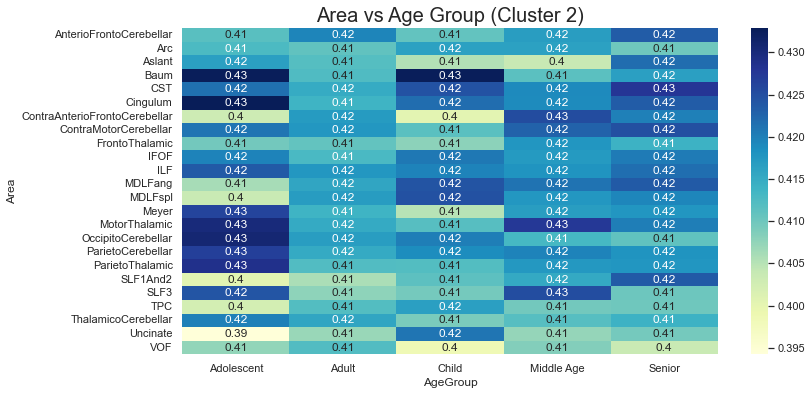

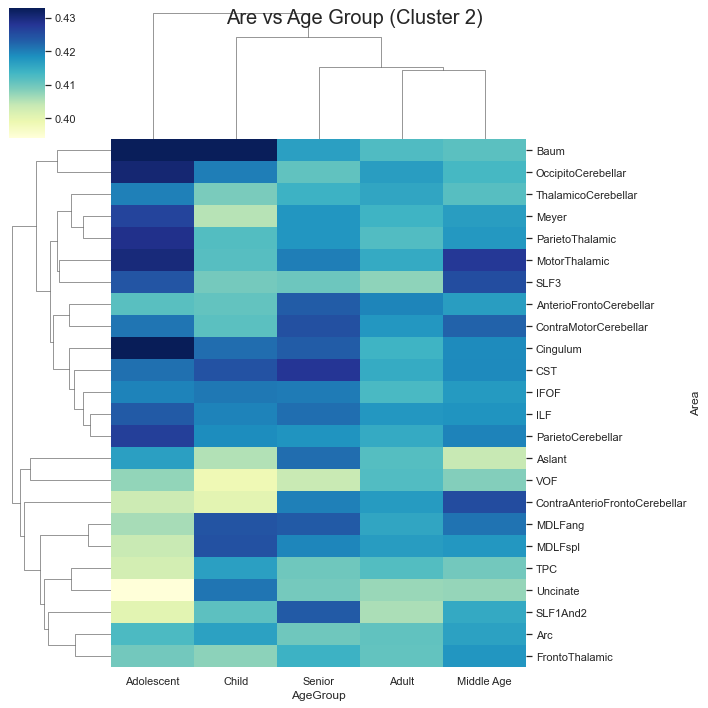

In [152]:
heatmap_data_2_2 = pd.pivot_table(C2, values='FA',
                             index=['Area'],
                             columns='AgeGroup')

#Drop 'NaN' for clustermap
heatmap_data_2_2_1 = heatmap_data_2_2[heatmap_data_2_2['Child'].notna()]
heatmap_data_2_2_2 = heatmap_data_2_2_1[heatmap_data_2_2_1['Senior'].notna()]
heatmap_data_2_2_3 = heatmap_data_2_2_2[heatmap_data_2_2_2['Adolescent'].notna()]

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_2_2_3, annot=True, cmap = 'YlGnBu')
plt.title("Area vs Age Group (Cluster 2)", fontsize =20)

sns.clustermap(heatmap_data_2_2_3, cmap = 'YlGnBu').fig.suptitle('Are vs Age Group (Cluster 2)', fontsize =20) 

## Cluster 3

### Category vs Age Group

Text(0.5, 0.98, 'Category vs Age Group (Cluster 3)')

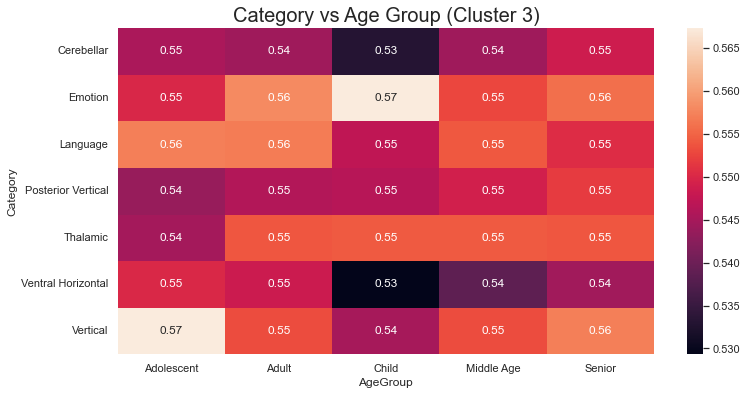

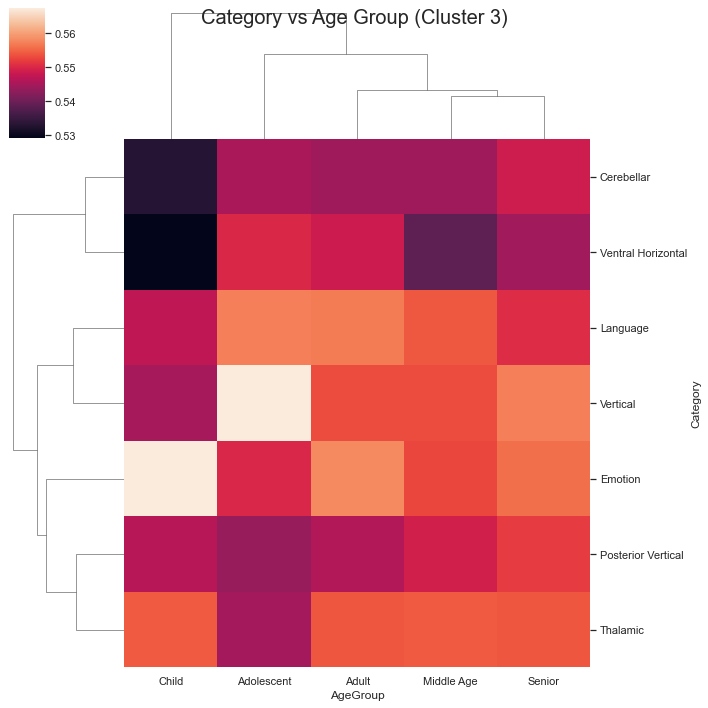

In [146]:
heatmap_data_3_1 = pd.pivot_table(C3, values='FA',
                             index=['Category'],
                             columns='AgeGroup')

#Drop 'NaN' for clustermap
heatmap_data_3_1_1 = heatmap_data_3_1[heatmap_data_3_1['Child'].notna()]

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_3_1_1, annot=True)
plt.title("Category vs Age Group (Cluster 3)", fontsize =20)

sns.clustermap(heatmap_data_3_1_1).fig.suptitle('Category vs Age Group (Cluster 3)', fontsize =20) 

### Area vs Age Group

Text(0.5, 0.98, 'Are vs Age Group (Cluster 3)')

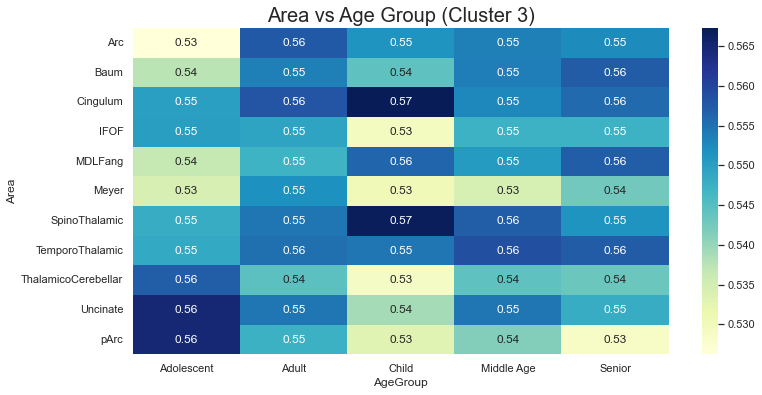

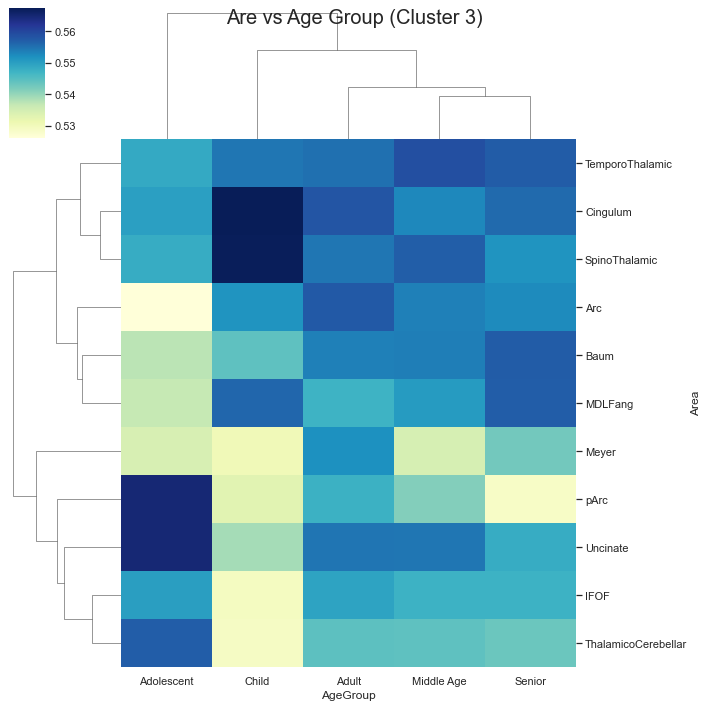

In [156]:
heatmap_data_3_2 = pd.pivot_table(C3, values='FA',
                             index=['Area'],
                             columns='AgeGroup')

#Drop 'NaN' for clustermap
heatmap_data_3_2_1 = heatmap_data_3_2[heatmap_data_3_2['Child'].notna()]
heatmap_data_3_2_2 = heatmap_data_3_2_1[heatmap_data_3_2_1['Adolescent'].notna()]

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_3_2_2, annot=True, cmap = 'YlGnBu')
plt.title("Area vs Age Group (Cluster 3)", fontsize =20)

sns.clustermap(heatmap_data_3_2_2, cmap = 'YlGnBu').fig.suptitle('Are vs Age Group (Cluster 3)', fontsize =20) 

## Cluster 4

### Category vs Age Group

Text(0.5, 0.98, 'Category vs Age Group (Cluster 4)')

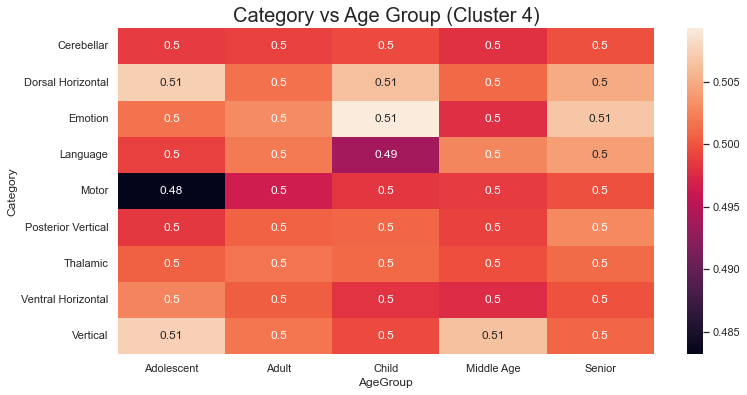

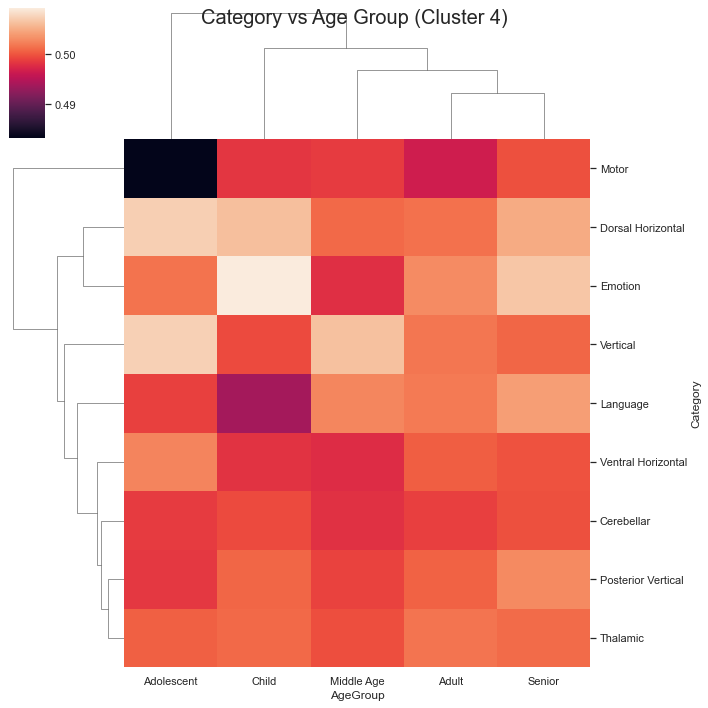

In [158]:
heatmap_data_4_1 = pd.pivot_table(C4, values='FA',
                             index=['Category'],
                             columns='AgeGroup')

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_4_1, annot=True)
plt.title("Category vs Age Group (Cluster 4)", fontsize =20)

sns.clustermap(heatmap_data_4_1).fig.suptitle('Category vs Age Group (Cluster 4)', fontsize =20) 

### Area vs Age Group

Text(0.5, 0.98, 'Are vs Age Group (Cluster 4)')

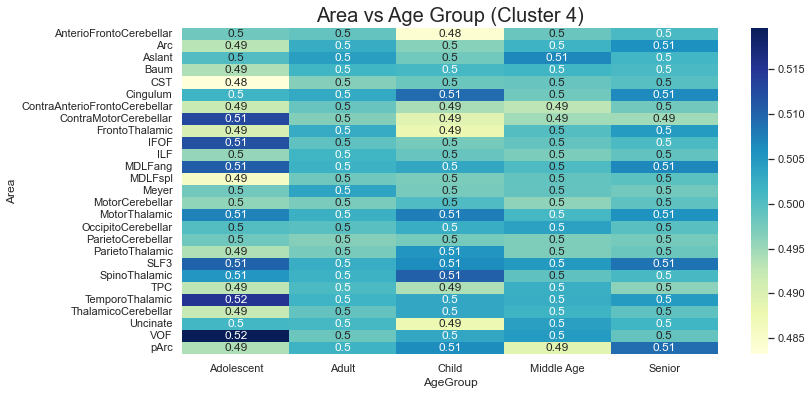

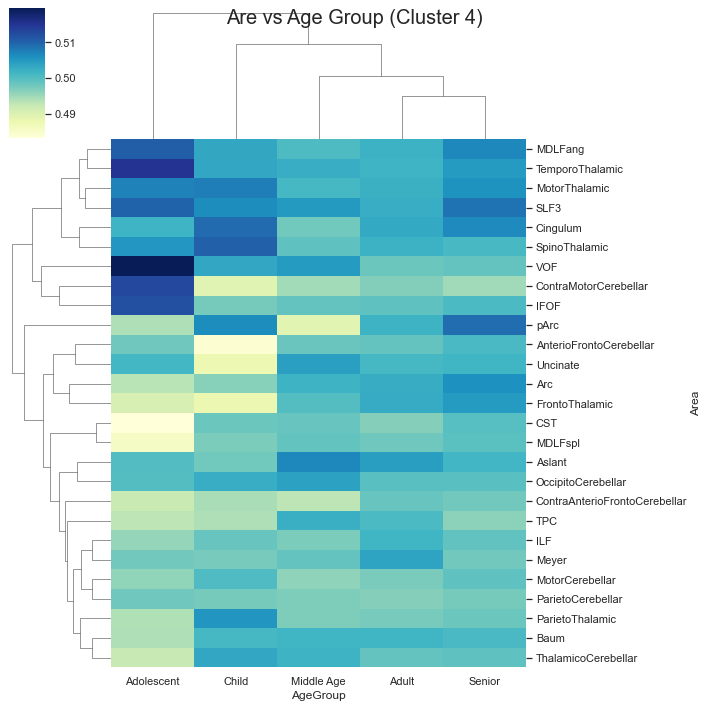

In [161]:
heatmap_data_4_2 = pd.pivot_table(C4, values='FA',
                             index=['Area'],
                             columns='AgeGroup')

#Drop 'NaN' for clustermap
heatmap_data_4_2_1 = heatmap_data_4_2[heatmap_data_4_2['Child'].notna()]

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_4_2_1, annot=True, cmap = 'YlGnBu')
plt.title("Area vs Age Group (Cluster 4)", fontsize =20)

sns.clustermap(heatmap_data_4_2_1, cmap = 'YlGnBu').fig.suptitle('Are vs Age Group (Cluster 4)', fontsize =20) 

## Cluster 5

### Category vs Age Group

Text(0.5, 0.98, 'Category vs Age Group (Cluster 5)')

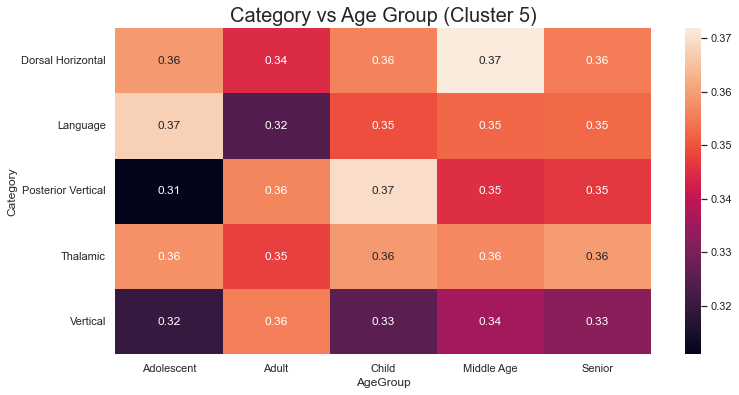

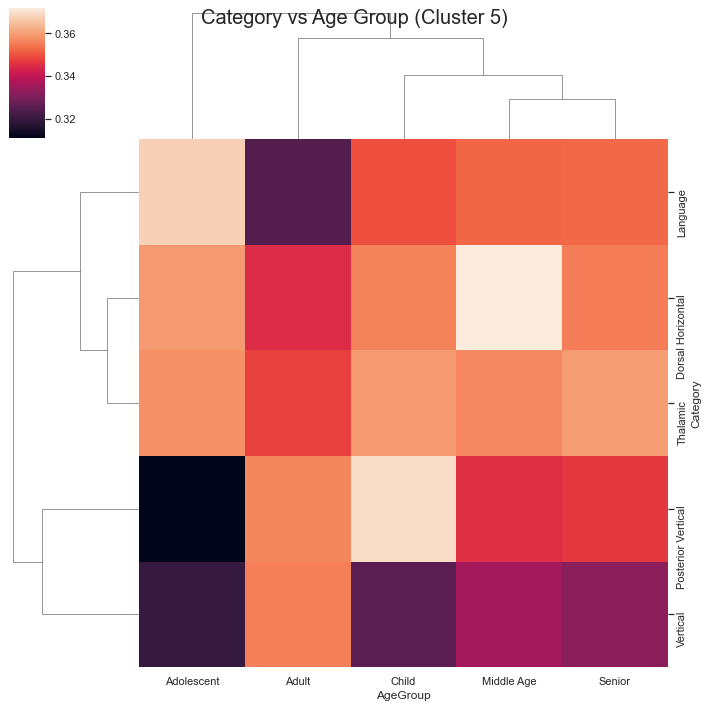

In [165]:
heatmap_data_5_1 = pd.pivot_table(C5, values='FA',
                             index=['Category'],
                             columns='AgeGroup')
#Drop 'NaN' for clustermap
heatmap_data_5_1_1 = heatmap_data_5_1[heatmap_data_5_1['Child'].notna()]
heatmap_data_5_1_2 = heatmap_data_5_1_1[heatmap_data_5_1_1['Adolescent'].notna()]

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_5_1_2, annot=True)
plt.title("Category vs Age Group (Cluster 5)", fontsize =20)

sns.clustermap(heatmap_data_5_1_2).fig.suptitle('Category vs Age Group (Cluster 5)', fontsize =20) 

### Area vs Age Group

Text(0.5, 0.98, 'Are vs Age Group (Cluster 5)')

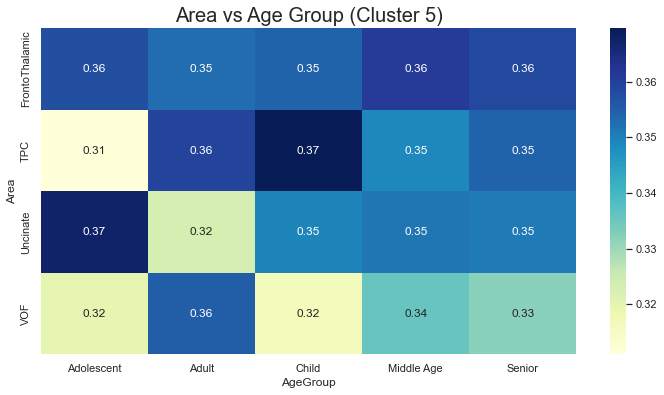

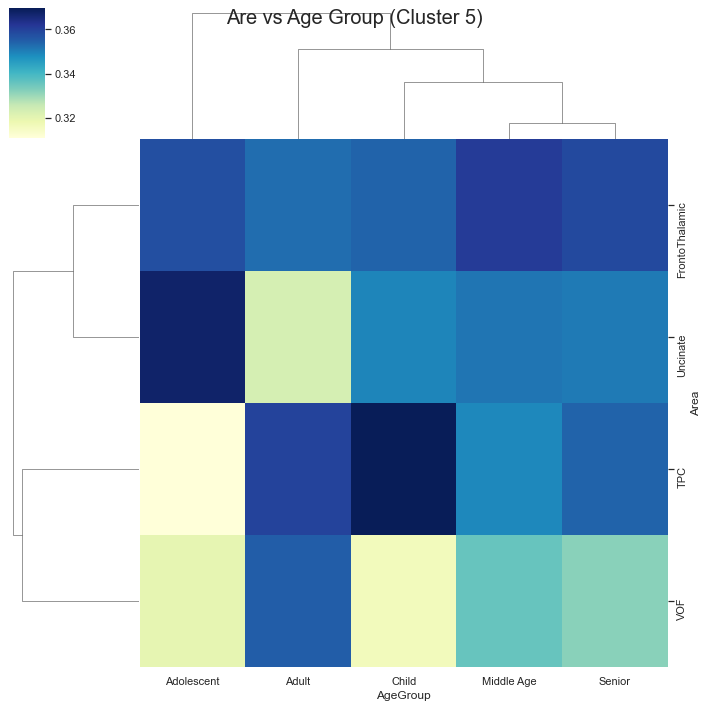

In [170]:
heatmap_data_5_2 = pd.pivot_table(C5, values='FA',
                             index=['Area'],
                             columns='AgeGroup')

#Drop 'NaN' for clustermap
heatmap_data_5_2_1 = heatmap_data_5_2[heatmap_data_5_2['Adolescent'].notna()]
heatmap_data_5_2_2 = heatmap_data_5_2_1[heatmap_data_5_2_1['Middle Age'].notna()]
heatmap_data_5_2_3 = heatmap_data_5_2_2[heatmap_data_5_2_2['Senior'].notna()]

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_5_2_3, annot=True, cmap = 'YlGnBu')
plt.title("Area vs Age Group (Cluster 5)", fontsize =20)

sns.clustermap(heatmap_data_5_2_3, cmap = 'YlGnBu').fig.suptitle('Are vs Age Group (Cluster 5)', fontsize =20) 

## Cluster 6

### Category vs Age Group

Text(0.5, 0.98, 'Category vs Age Group (Cluster 6)')

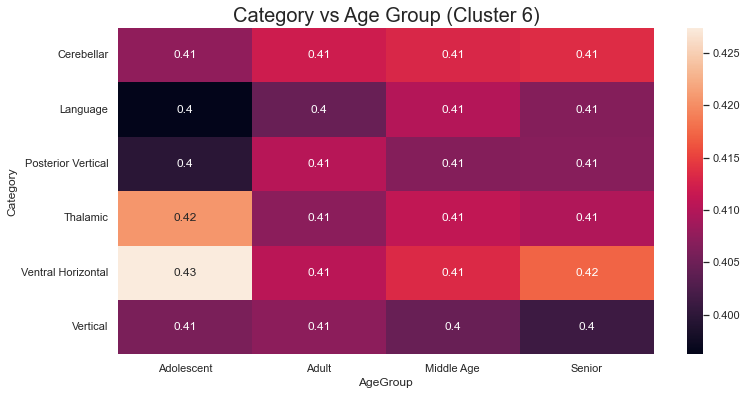

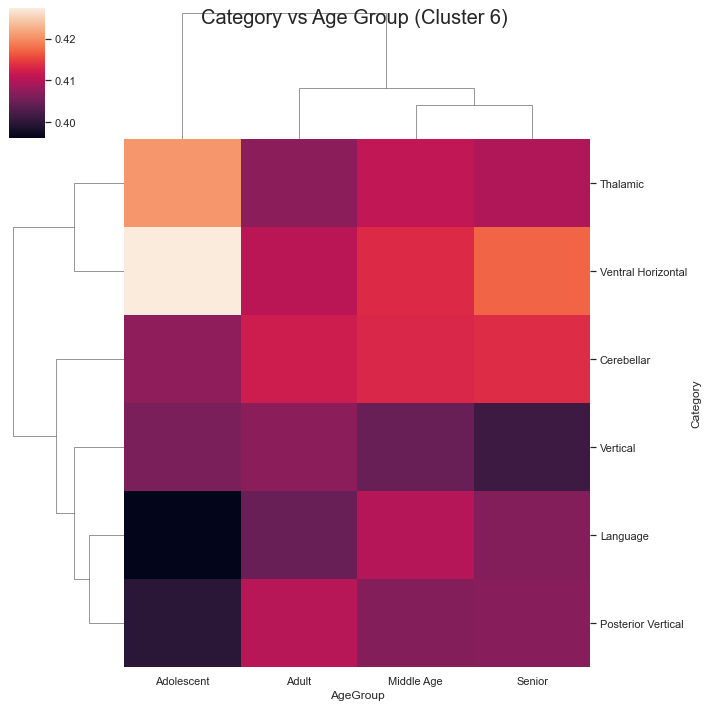

In [173]:
heatmap_data_6_1 = pd.pivot_table(C6, values='FA',
                             index=['Category'],
                             columns='AgeGroup')

#Drop 'NaN' for clustermap
heatmap_data_6_1_1 = heatmap_data_6_1[heatmap_data_6_1['Adolescent'].notna()]

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_6_1_1, annot=True)
plt.title("Category vs Age Group (Cluster 6)", fontsize =20)

sns.clustermap(heatmap_data_6_1_1).fig.suptitle('Category vs Age Group (Cluster 6)', fontsize =20)

### Area vs Age Group

Text(0.5, 0.98, 'Are vs Age Group (Cluster 6)')

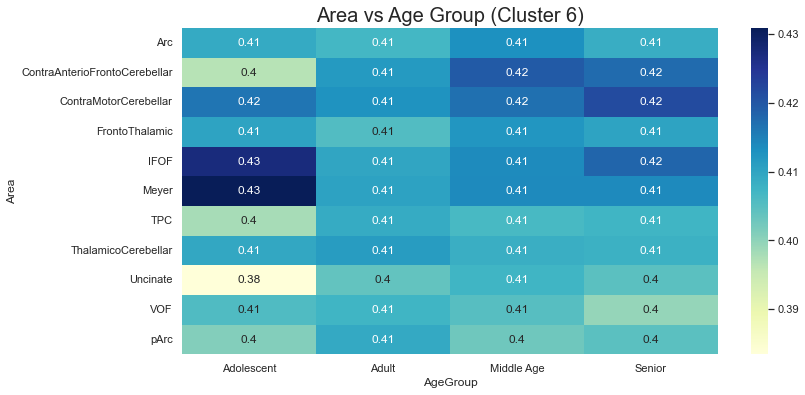

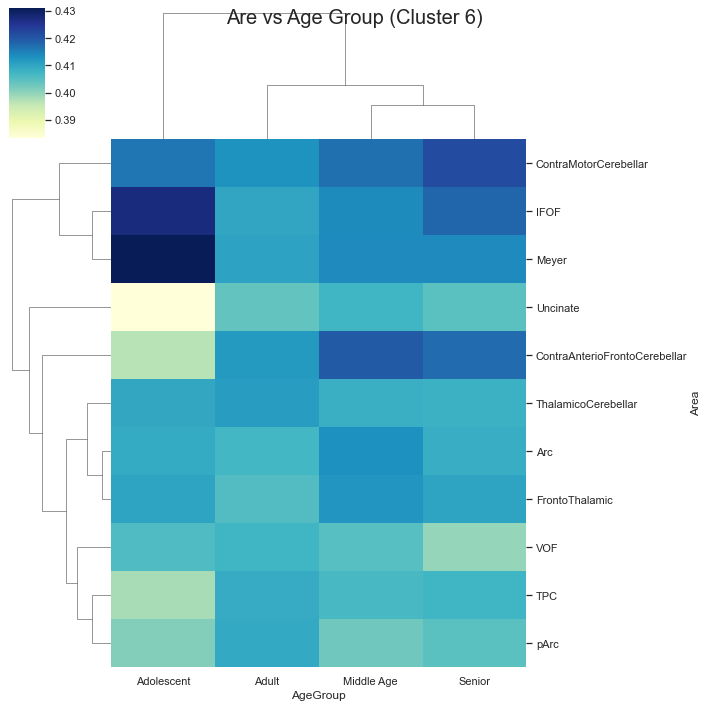

In [176]:
heatmap_data_6_2 = pd.pivot_table(C6, values='FA',
                             index=['Area'],
                             columns='AgeGroup')

#Drop 'NaN' for clustermap
heatmap_data_6_2_1 = heatmap_data_6_2[heatmap_data_6_2['Adolescent'].notna()]

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(heatmap_data_6_2_1, annot=True, cmap = 'YlGnBu')
plt.title("Area vs Age Group (Cluster 6)", fontsize =20)

sns.clustermap(heatmap_data_6_2_1, cmap = 'YlGnBu').fig.suptitle('Are vs Age Group (Cluster 6)', fontsize =20) 